In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
sns.set_theme(style="ticks", color_codes=True)

# Ignoring some warnings
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# To get the higher quality display of graphs:
import matplotlib
%config InlineBackend.figure_format = 'retina'

font = {'family' : 'sans-serif',
        'weight' : 'bold'}

matplotlib.rc('font', **font)

In [3]:
df_product = pd.read_csv('product_data.csv')
df_product.head(3)

,Country,Product,Year,Month,Unit Price
0,AUS,Beef,2016.0,Jan,2.27
1,AUS,Beef,2016.0,Jan,4.70
2,IRE,Beef,2019.0,Mar,3.20


In [4]:
# Check for the count of null values:
df_product.isnull().sum()

Country       1
Product       1
Year          1
Month         0
Unit Price    1
dtype: int64

In [5]:
# Filling in null year with 1970
df_product['Year'] = df_product['Year'].fillna(1970)
df_product.isnull().sum()

Country       1
Product       1
Year          0
Month         0
Unit Price    1
dtype: int64

In [6]:
# Identify the shape of User file
df_product.shape

(33, 5)

In [7]:
# Cleaning the data by removing all the null values:
df_product_clean = df_product.dropna()
df_product_clean.shape

(30, 5)

In [8]:
df_product_clean.head(3)

,Country,Product,Year,Month,Unit Price
0,AUS,Beef,2016.0,Jan,2.27
1,AUS,Beef,2016.0,Jan,4.70
2,IRE,Beef,2019.0,Mar,3.20


In [9]:
# Converting float year to float
df_product_clean['Year'] = df_product_clean['Year'].astype('float')

# Converting float year to int
df_product_clean['Year'] = df_product_clean['Year'].astype('int')

df_product_clean.dtypes

Country        object
Product        object
Year            int64
Month          object
Unit Price    float64
dtype: object

In [10]:
# Converting to string and Combining Column
df_product_clean['Year'] = df_product_clean['Year'].apply(str)
df_product_clean["Month_Year"] = df_product_clean["Year"] + '-' + df_product_clean["Month"]
df_product_clean.head(3)

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,2016,Jan,2.27,2016-Jan
1,AUS,Beef,2016,Jan,4.70,2016-Jan
2,IRE,Beef,2019,Mar,3.20,2019-Mar


In [11]:
# Converting float year to float
df_product_clean['Year'] = df_product_clean['Year'].astype('float')

# Converting float year to int
df_product_clean['Year'] = df_product_clean['Year'].astype('int')

df_product_clean.dtypes

Country        object
Product        object
Year            int64
Month          object
Unit Price    float64
Month_Year     object
dtype: object

In [12]:
df_product_clean.head(3)

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,2016,Jan,2.27,2016-Jan
1,AUS,Beef,2016,Jan,4.70,2016-Jan
2,IRE,Beef,2019,Mar,3.20,2019-Mar


In [13]:
df_pc_sorted = df_product_clean.iloc[pd.to_datetime(df_product_clean.Month_Year).argsort().reset_index(drop=True)]
df_pc_sorted.head(10)

,Country,Product,Year,Month,Unit Price,Month_Year
15,AUS,Beef,1970,Jul,8.36,1970-Jul
0,AUS,Beef,2016,Jan,2.27,2016-Jan
1,AUS,Beef,2016,Jan,4.70,2016-Jan
16,IRE,Beef,2016,Feb,1.24,2016-Feb
12,AUS,Beef,2016,Feb,6.46,2016-Feb
17,IRE,Beef,2016,May,1.74,2016-May
3,IRE,Beef,2016,Jun,1.18,2016-Jun
19,IRE,Beef,2016,Jun,1.18,2016-Jun
21,IRE,Beef,2016,Jul,3.77,2016-Jul
5,AUS,Beef,2016,Jul,3.77,2016-Jul


In [14]:
# Resetting the index
df_pc_sorted.reset_index(drop=True, inplace=True)
df_pc_sorted.head()

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,1970,Jul,8.36,1970-Jul
1,AUS,Beef,2016,Jan,2.27,2016-Jan
2,AUS,Beef,2016,Jan,4.70,2016-Jan
3,IRE,Beef,2016,Feb,1.24,2016-Feb
4,AUS,Beef,2016,Feb,6.46,2016-Feb


In [15]:
df_pc_sorted.head()

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,1970,Jul,8.36,1970-Jul
1,AUS,Beef,2016,Jan,2.27,2016-Jan
2,AUS,Beef,2016,Jan,4.70,2016-Jan
3,IRE,Beef,2016,Feb,1.24,2016-Feb
4,AUS,Beef,2016,Feb,6.46,2016-Feb


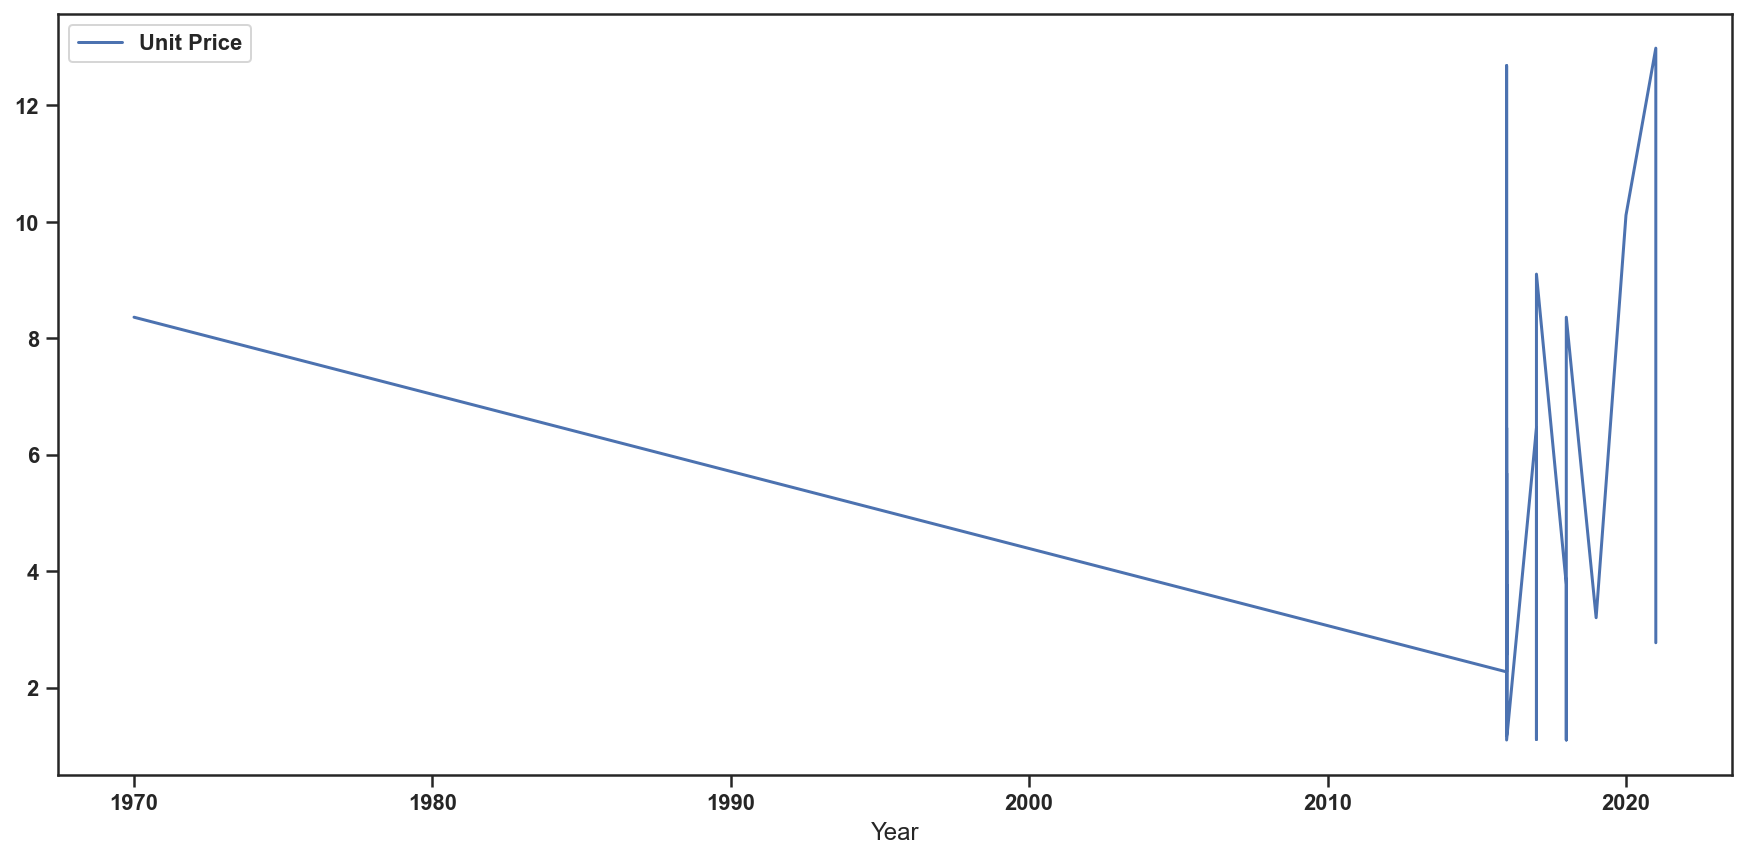

In [16]:
lines = df_pc_sorted.plot.line(x='Year', y='Unit Price', figsize=(15,7))

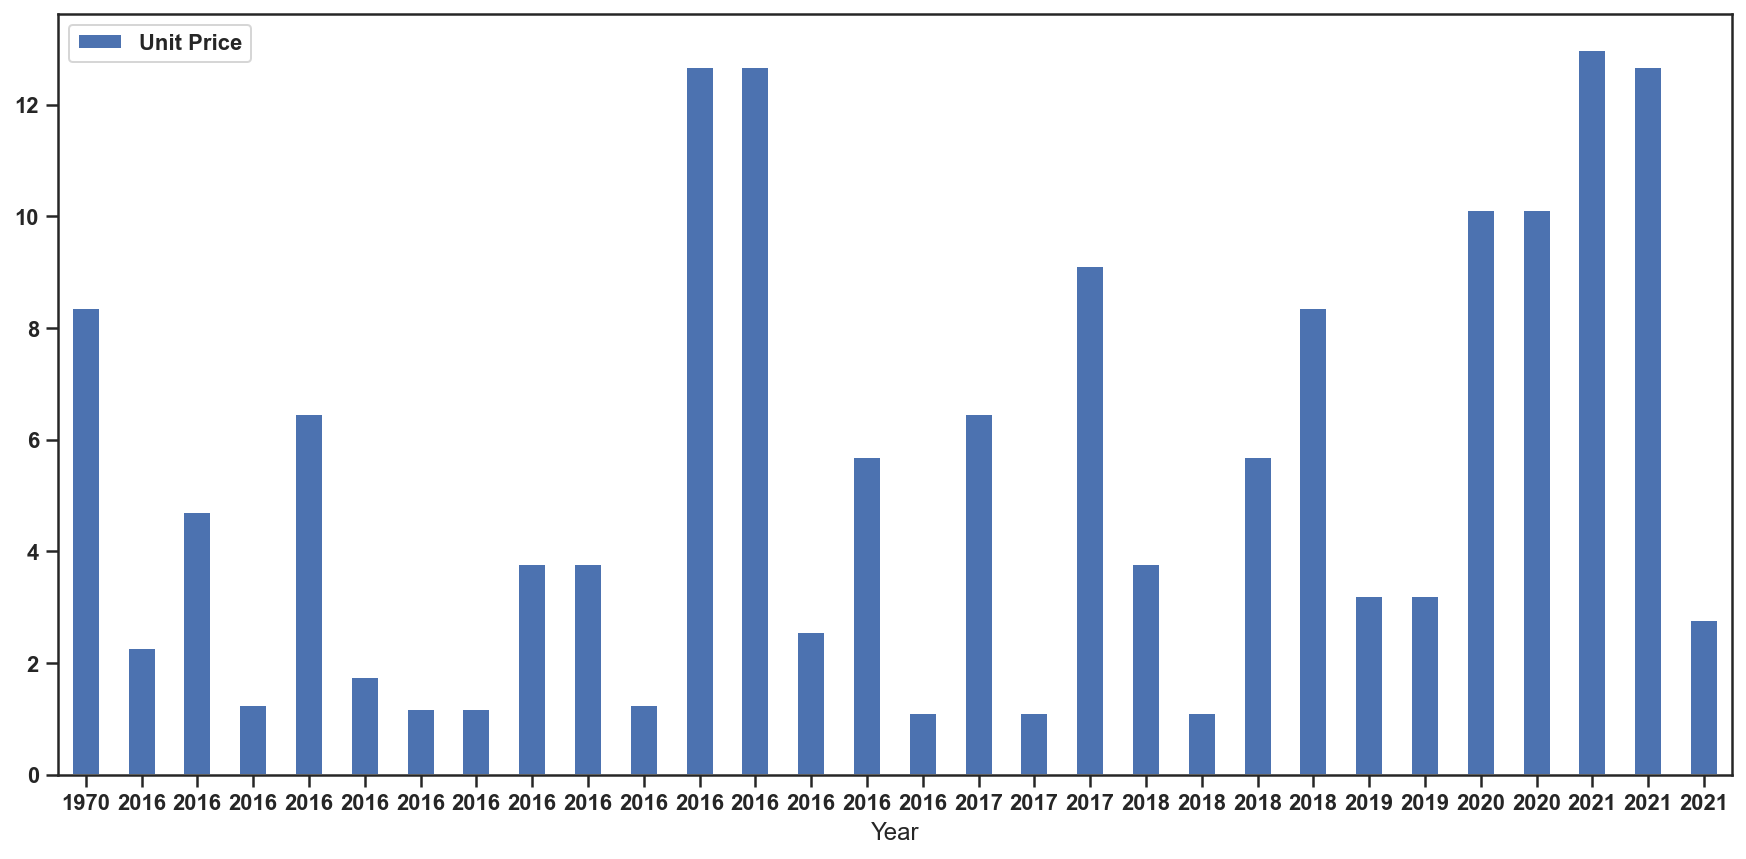

In [17]:
ax = df_pc_sorted.plot.bar(x='Year', y='Unit Price', rot=0, figsize=(15,7))

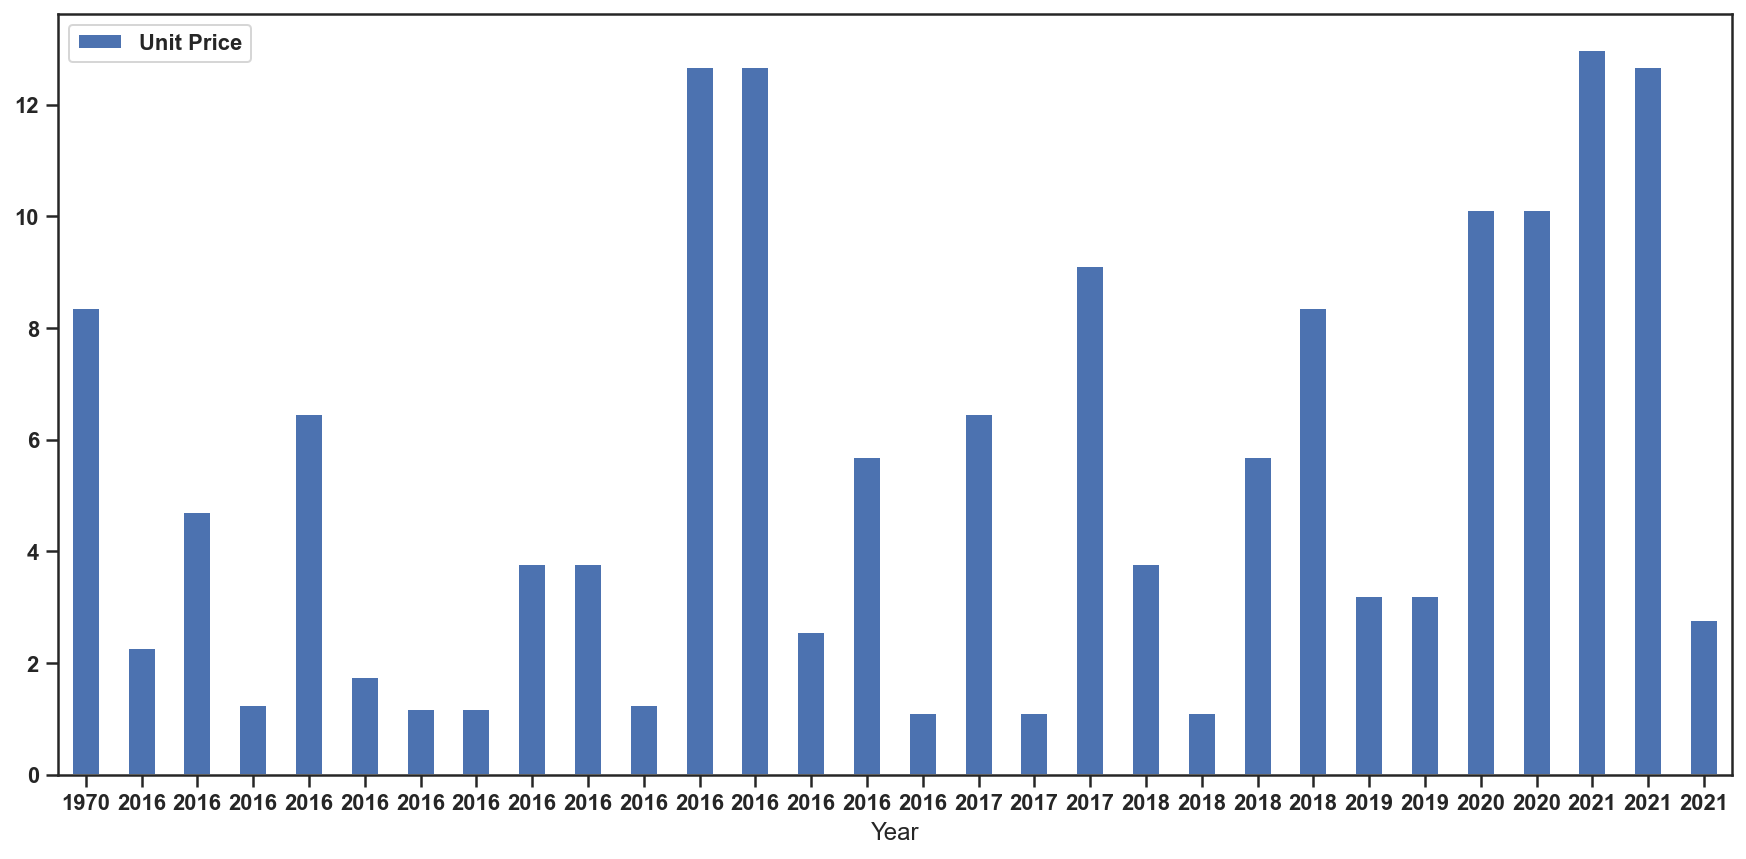

In [18]:
ax = df_pc_sorted.plot.bar(x='Year', y='Unit Price', rot=0, figsize=(15,7))

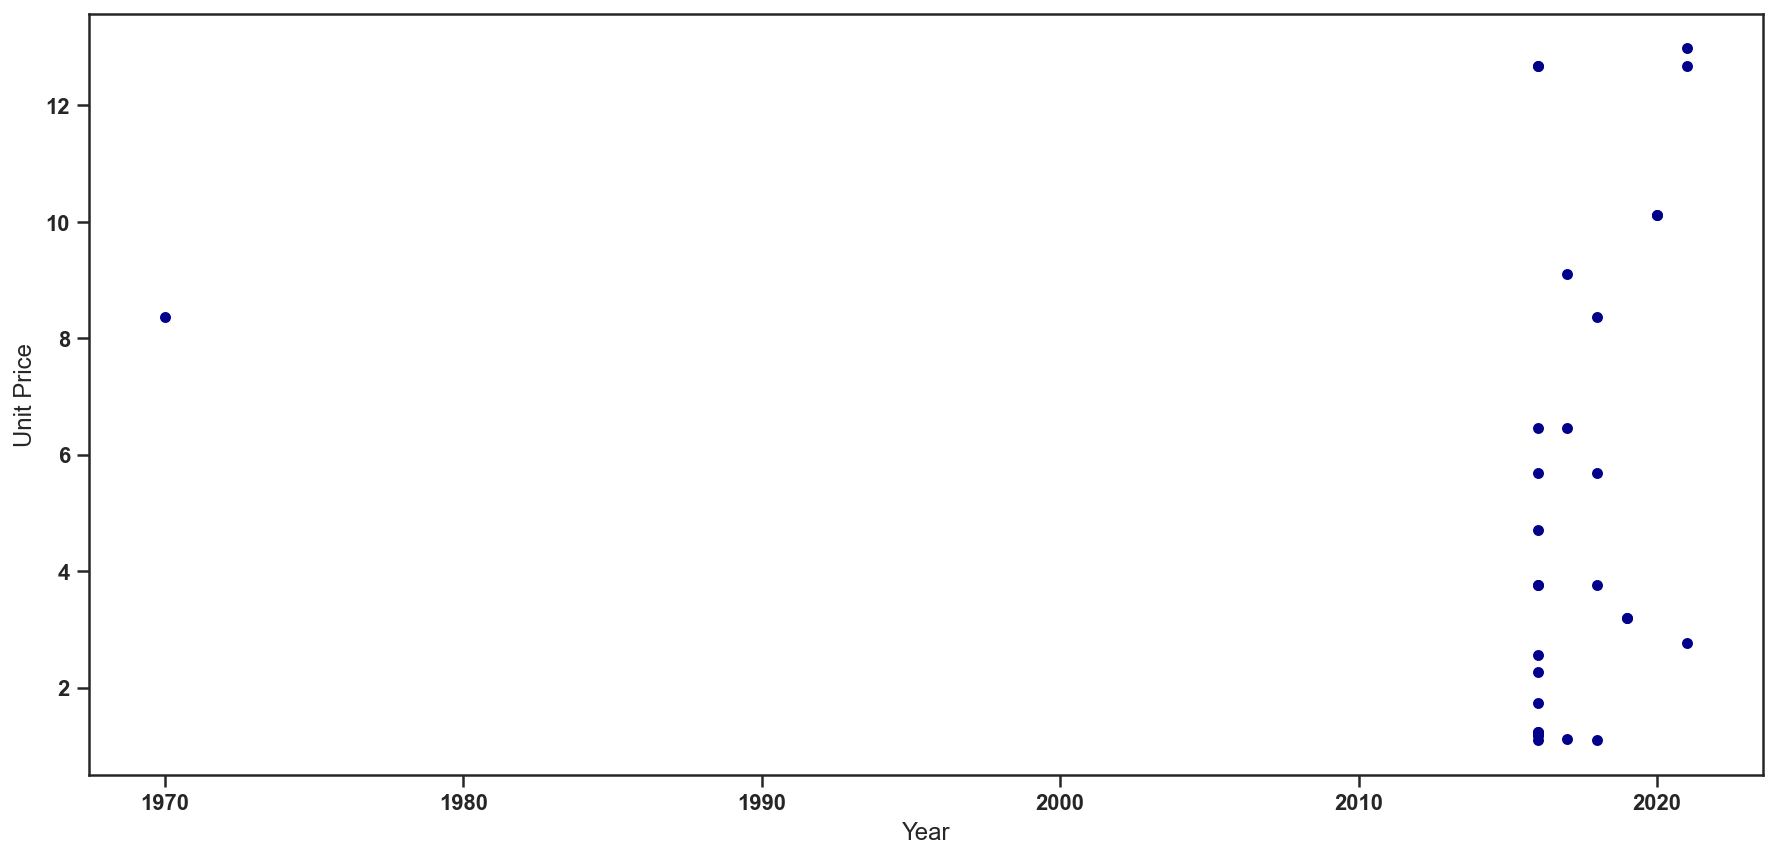

In [19]:
ax1 = df_pc_sorted.plot.scatter(x='Year', y='Unit Price', c='DarkBlue', figsize=(15,7))

In [20]:
df_pc_sorted.head()

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,1970,Jul,8.36,1970-Jul
1,AUS,Beef,2016,Jan,2.27,2016-Jan
2,AUS,Beef,2016,Jan,4.70,2016-Jan
3,IRE,Beef,2016,Feb,1.24,2016-Feb
4,AUS,Beef,2016,Feb,6.46,2016-Feb


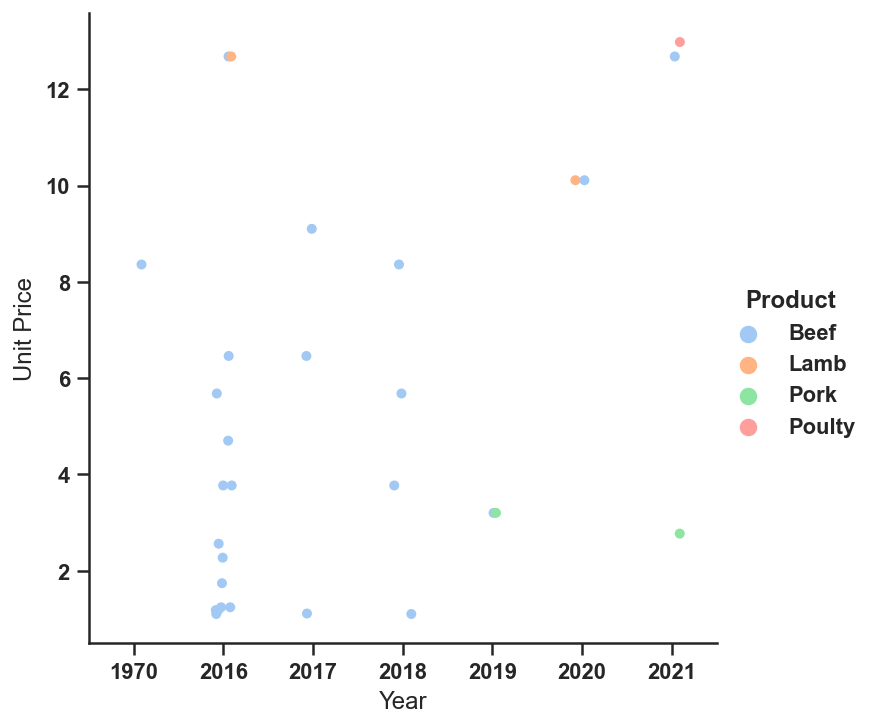

In [21]:
sns.catplot(x = "Year", y="Unit Price", hue="Product",
            palette="pastel", edgecolor=".6",
            data=df_pc_sorted)

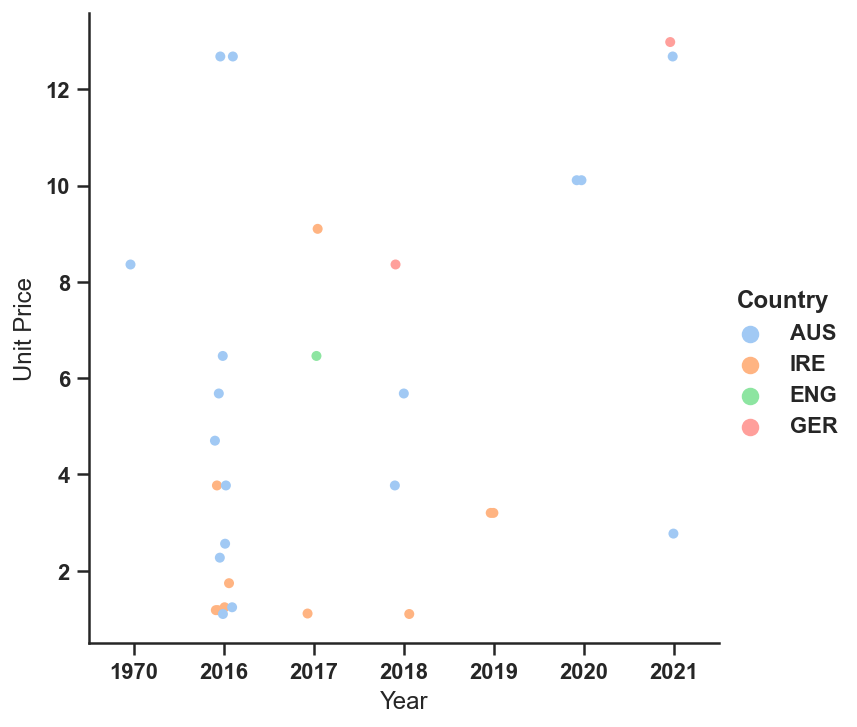

In [22]:
# sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(x = "Year", y="Unit Price", hue="Country",
            palette="pastel", edgecolor="1.0",
            data=df_pc_sorted)

In [23]:
df_pc_sorted.head()

,Country,Product,Year,Month,Unit Price,Month_Year
0,AUS,Beef,1970,Jul,8.36,1970-Jul
1,AUS,Beef,2016,Jan,2.27,2016-Jan
2,AUS,Beef,2016,Jan,4.70,2016-Jan
3,IRE,Beef,2016,Feb,1.24,2016-Feb
4,AUS,Beef,2016,Feb,6.46,2016-Feb


In [24]:
columns = ['Month_Year', 'Month','Product']
df_country = df_product_clean.drop(columns, axis=1)
df_country.head()

,Country,Year,Unit Price
0,AUS,2016,2.27
1,AUS,2016,4.70
2,IRE,2019,3.20
3,IRE,2016,1.18
4,AUS,2016,1.10


In [25]:
df2 = df_country.groupby(["Country", "Year"]).sum('Unit Price')
df2

Unit Price
Country Year            
AUS     1970        8.36
        2016       53.14
        2018        9.45
        2020       20.22
        2021       15.45
ENG     2017        6.46
GER     2018        8.36
        2021       12.98
IRE     2016        9.11
        2017       10.21
        2018        1.10
        2019        6.40

In [26]:
df3 = pd.pivot_table(df2,  values='Unit Price',  columns=['Year'],  index = "Country",
                         aggfunc=np.sum,  fill_value=0)
df3.head()

Year,1970,2016,2017,2018,2019,2020,2021
Country,,,,,,,
AUS,8.36,53.14,0.00,9.45,0.0,20.22,15.45
ENG,0.00,0.00,6.46,0.00,0.0,0.00,0.00
GER,0.00,0.00,0.00,8.36,0.0,0.00,12.98
IRE,0.00,9.11,10.21,1.10,6.4,0.00,0.00


In [27]:
df4 = pd.pivot_table(df2,  values='Unit Price',  columns=['Country'],  index = "Year",
                         aggfunc=np.sum,  fill_value=0)
df4.head()

Country,AUS,ENG,GER,IRE
Year,,,,
1970,8.36,0.00,0.00,0.00
2016,53.14,0.00,0.00,9.11
2017,0.00,6.46,0.00,10.21
2018,9.45,0.00,8.36,1.10
2019,0.00,0.00,0.00,6.40


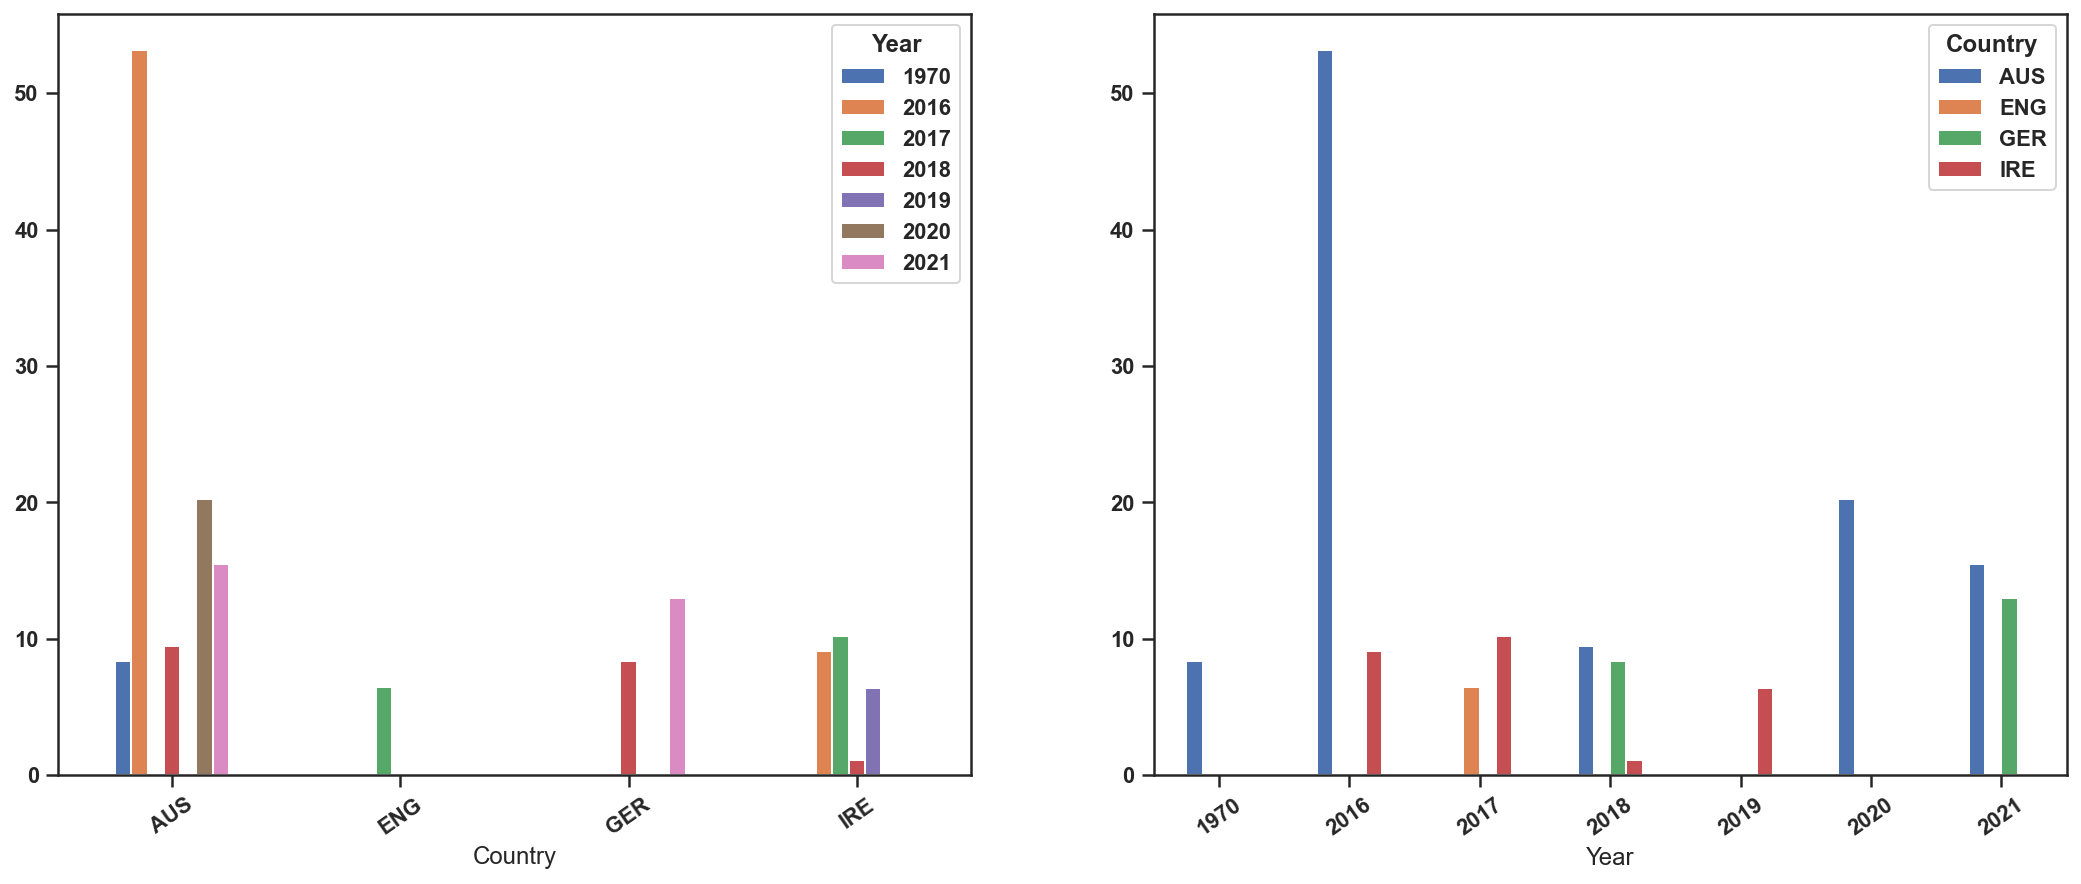

In [28]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
df3.plot(kind="bar", ax=ax[0], rot=35)
df4.plot(kind="bar", ax=ax[1], rot=35) 
plt.show()

#### Similar to above we will perform for 'Product'

In [29]:
columns = ['Month_Year', 'Month','Country']
df_product = df_product_clean.drop(columns, axis=1)
df_product.head()

,Product,Year,Unit Price
0,Beef,2016,2.27
1,Beef,2016,4.70
2,Beef,2019,3.20
3,Beef,2016,1.18
4,Beef,2016,1.10


In [30]:
df2 = df_product.groupby(["Product", "Year"]).sum('Unit Price')
df2

Unit Price
Product Year            
Beef    1970        8.36
        2016       49.57
        2017       16.67
        2018       18.91
        2019        3.20
        2020       10.11
        2021       12.68
Lamb    2016       12.68
        2020       10.11
Pork    2019        3.20
        2021        2.77
Poulty  2021       12.98

In [31]:
df3 = pd.pivot_table(df2,  values='Unit Price',  columns=['Year'],  index = "Product",
                         aggfunc=np.sum,  fill_value=0)
df3.head()

Year,1970,2016,2017,2018,2019,2020,2021
Product,,,,,,,
Beef,8.36,49.57,16.67,18.91,3.2,10.11,12.68
Lamb,0.00,12.68,0.00,0.00,0.0,10.11,0.00
Pork,0.00,0.00,0.00,0.00,3.2,0.00,2.77
Poulty,0.00,0.00,0.00,0.00,0.0,0.00,12.98


In [32]:
df4 = pd.pivot_table(df2,  values='Unit Price',  columns=['Product'],  index = "Year",
                         aggfunc=np.sum,  fill_value=0)
df4.head()

Product,Beef,Lamb,Pork,Poulty
Year,,,,
1970,8.36,0.00,0.0,0.0
2016,49.57,12.68,0.0,0.0
2017,16.67,0.00,0.0,0.0
2018,18.91,0.00,0.0,0.0
2019,3.20,0.00,3.2,0.0


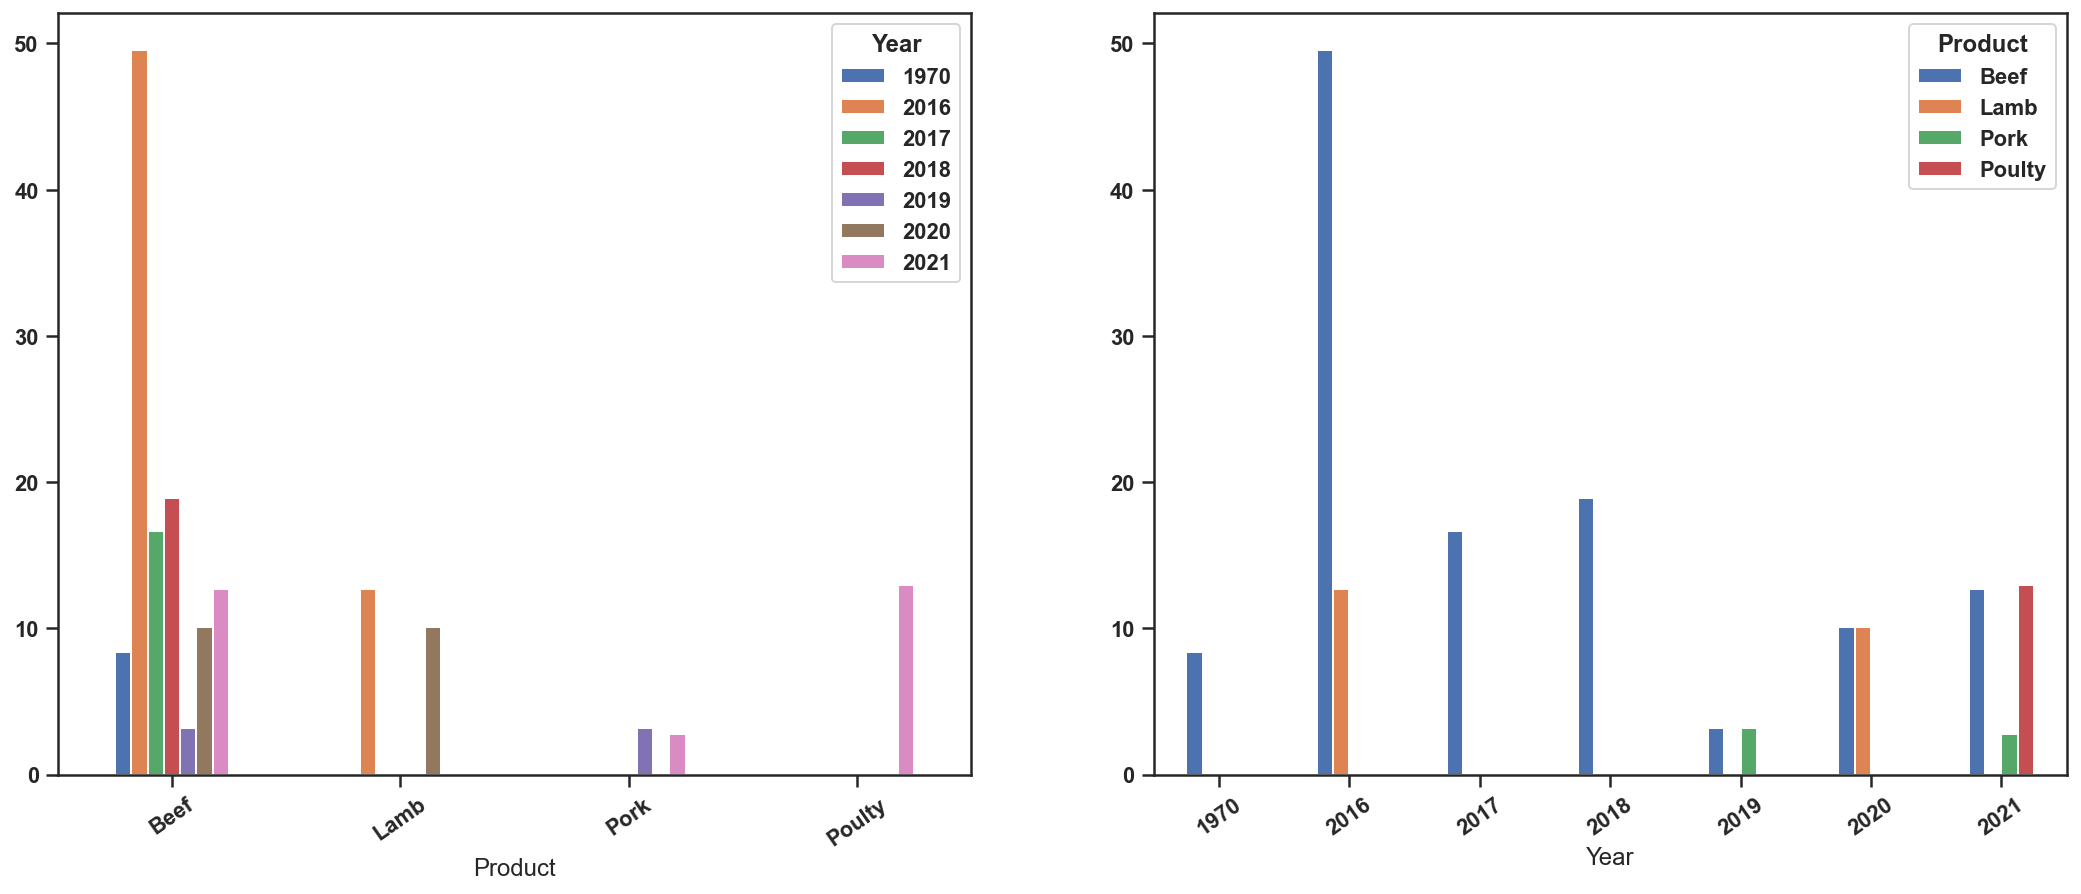

In [33]:
fig, ax = plt.subplots(1,2, figsize=(18,7))
df3.plot(kind="bar", ax=ax[0],rot=35)
df4.plot(kind="bar", ax=ax[1],rot=35) 
plt.show()